In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity

import transport_signal_processing as tsp
from data_manager import DataManager

## Select and load events

In [2]:
# parameters
path = "*"
level = 1
selected_only = True

# setup database connector
sigman = DataManager('database')

# load segments informations
sinfo_l = sigman.load_info(path, 's*')

# convert info to dataframe
df = pd.DataFrame(sinfo_l)

# add full condition key
df['condition'] = df.apply(lambda x: "{}-{}-{}".format(x['pore'], x['analyte'], x['voltage']), axis=1)

# keep only selected segments
df = df[(df['selected'] > (level-1))]
df

pore  analyte voltage temperature channel replica part  sid  \
0    K238A  4MpS129     110          25     002       2  000    0   
1    K238A  4MpS129     110          25     002       2  000    5   
2    K238A  4MpS129     110          25     002       2  000    2   
4    K238A  4MpS129     110          25     002       2  000    3   
5    K238A  4MpS129     110          25     002       2  000    1   
..     ...      ...     ...         ...     ...     ...  ...  ...   
446  K238A     4MWT      90          25     002       6  000    0   
447  K238A     4MWT      90          25     002       6  000    2   
448  K238A     4MWT      90          25     002       6  000    4   
449  K238A     4MWT      90          25     002       6  000    3   
450  K238A     4MWT      90          25     002       6  000    1   

            segment_range  segment_duration             MODIFIED     mI_open  \
0            [0, 5175305]          51.75305  2022-07-19_11:51:33  269.105127   
1    [13534155, 16918655]          33.84500  2022-07-19_11:51:33  269.437320   
2      [6440872, 8206222]          17.65350  2022-07-19_11:51:33  269.417231   
4     [8221625, 12644571]          44.22946  2022-07-19_11:51:33  268.956094   
5      [5190143, 6424770]          12.34627  2022-07-19_11:51:33  269.799865   
..                    ...               ...                  ...         ...   
446          [0, 3667914]          36.67914  2022-07-19_11:51:32  227.582185   
447   [7887870, 12825697]          49.37827  2022-07-19_11:51:32  227.569874   
448  [25173526, 25353087]           1.79561  2022-07-19_11:51:32  227.674492   
449  [12841906, 25158783]         123.16877  2022-07-19_11:51:32  227.540382   
450    [3682584, 7872568]          41.89984  2022-07-19_11:51:32  227.475644   

      sI_open  N_events  N_cores  N_reduced  selected  ratio_sel  \
0    3.009677       393    183.0      183.0       1.0   0.557377   
1    3.055949       269    120.0      120.0       1.0   0.641667   
2    3.077835       142     71.0       71.0       1.0   0.661972   
4    3.016734       370    184.0      184.0       1.0   0.652174   
5    3.041549        73     32.0       32.0       1.0   0.562500   
..        ...       ...      ...        ...       ...        ...   
446  2.448905       583    319.0      319.0       1.0   0.721003   
447  2.437306       745    432.0      432.0       1.0   0.717593   
448  2.377264        28     17.0       17.0       1.0   0.823529   
449  2.406751      1987   1103.0     1103.0       1.0   0.696283   
450  2.445273       701    376.0      376.0       1.0   0.710106   

             condition  
0    K238A-4MpS129-110  
1    K238A-4MpS129-110  
2    K238A-4MpS129-110  
4    K238A-4MpS129-110  
5    K238A-4MpS129-110  
..                 ...  
446      K238A-4MWT-90  
447      K238A-4MWT-90  
448      K238A-4MWT-90  
449      K238A-4MWT-90  
450      K238A-4MWT-90  

[366 rows x 19 columns]

In [3]:
# parameters
key_sel = 'condition'

# load stats grouped by selected key
stats_dict = tsp.utils.load_stats_for_key(sigman, df.to_dict('records'), key_sel, selected_only=selected_only)

# find keys
key_sels = np.unique(df[key_sel].values)

events_dict = {}
for key in tqdm(key_sels):
    # subset
    dfs = df[df[key_sel] == key].copy()

    # load core events
    events_dict[key] = tsp.utils.load_core_events(sigman, dfs.to_dict('record'), selected_only=selected_only)
    #tsp.utils.load_reduced_events(sigman, dfs.to_dict('record'), selected_only=selected_only)

  0%|          | 0/17 [00:00<?, ?it/s]<ipython-input-3-6b2155c1c31e>:16: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  events_dict[key] = tsp.utils.load_core_events(sigman, dfs.to_dict('record'), selected_only=selected_only)
100%|██████████| 17/17 [00:00<00:00, 27.68it/s]


## Clustering

100%|██████████| 6604/6604 [00:06<00:00, 977.90it/s]


K238A-4MWT-100


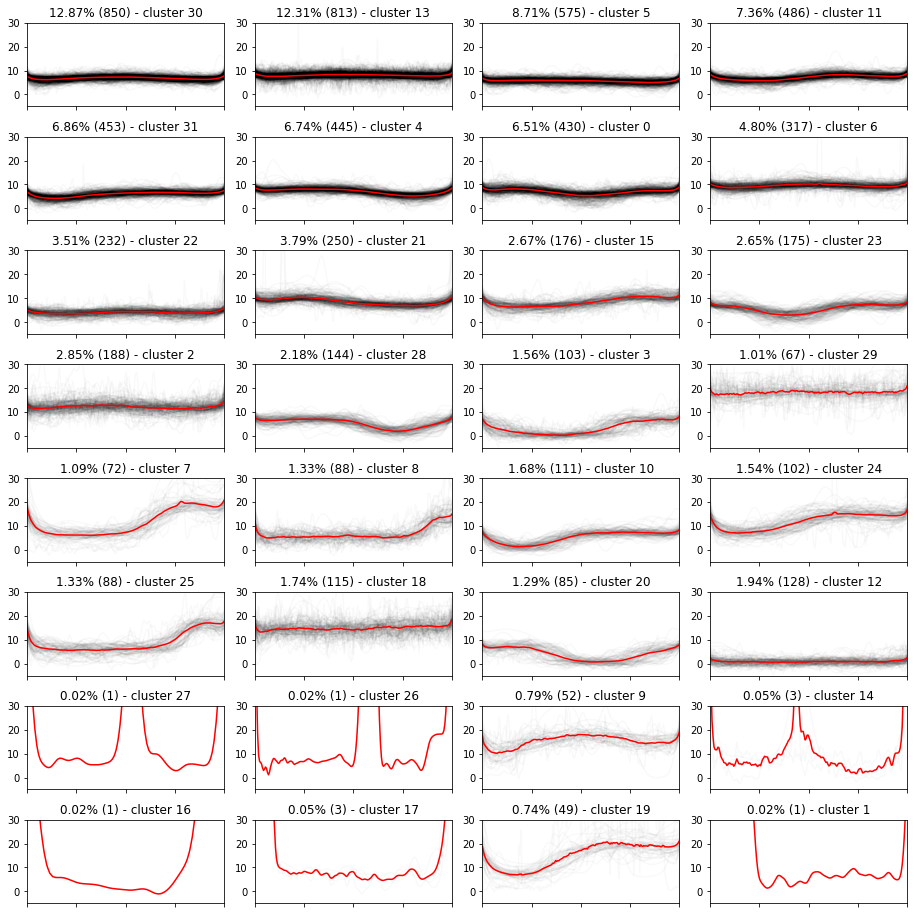

100%|██████████| 2146/2146 [00:02<00:00, 988.03it/s]


K238A-4MWT-110


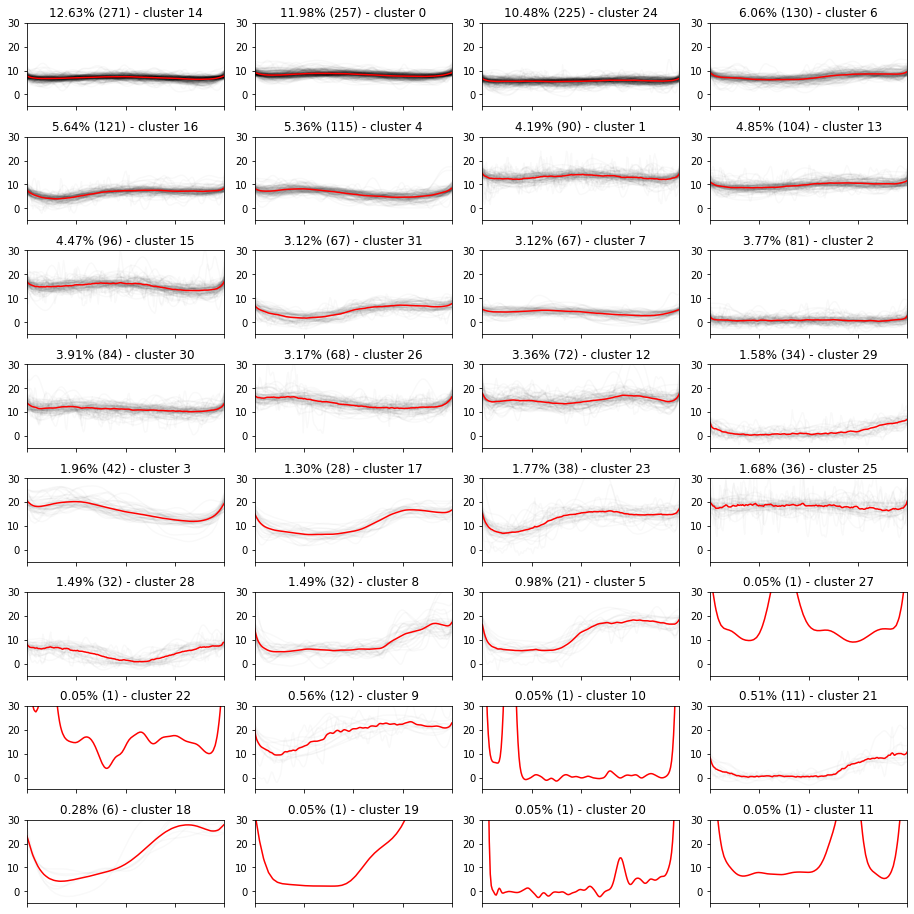

100%|██████████| 1935/1935 [00:01<00:00, 996.61it/s] 


K238A-4MWT-120


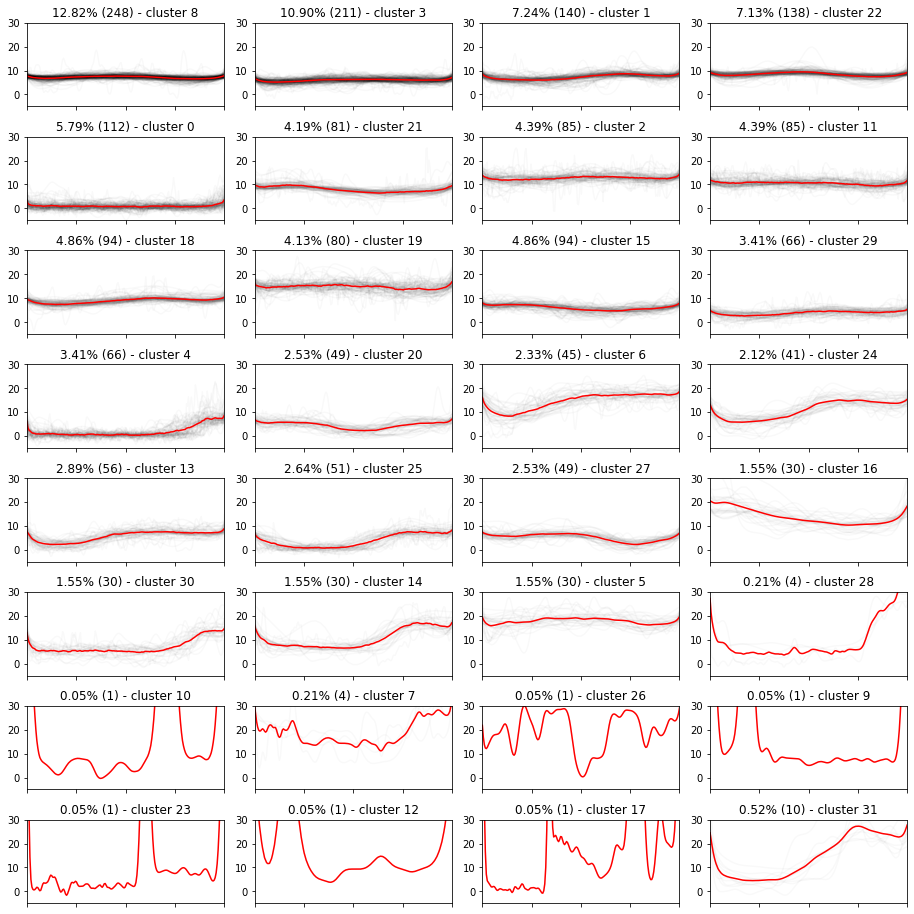

100%|██████████| 1322/1322 [00:01<00:00, 986.61it/s]


K238A-4MWT-140


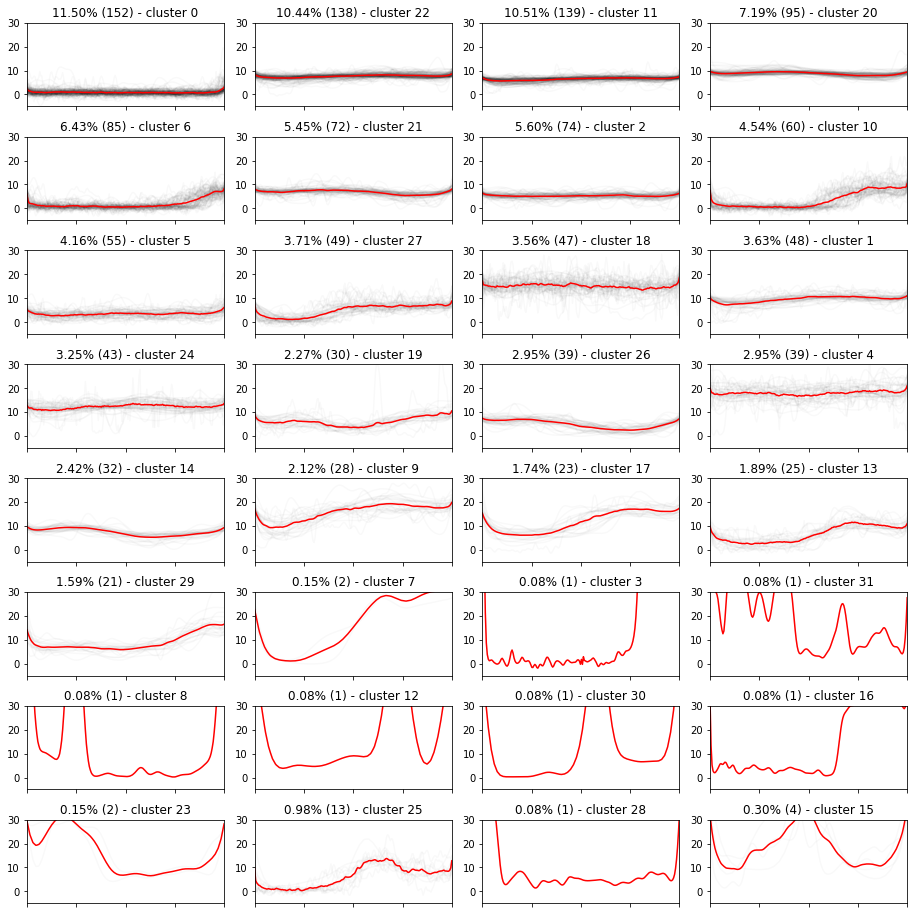

100%|██████████| 5655/5655 [00:05<00:00, 999.81it/s] 


K238A-4MWT-80


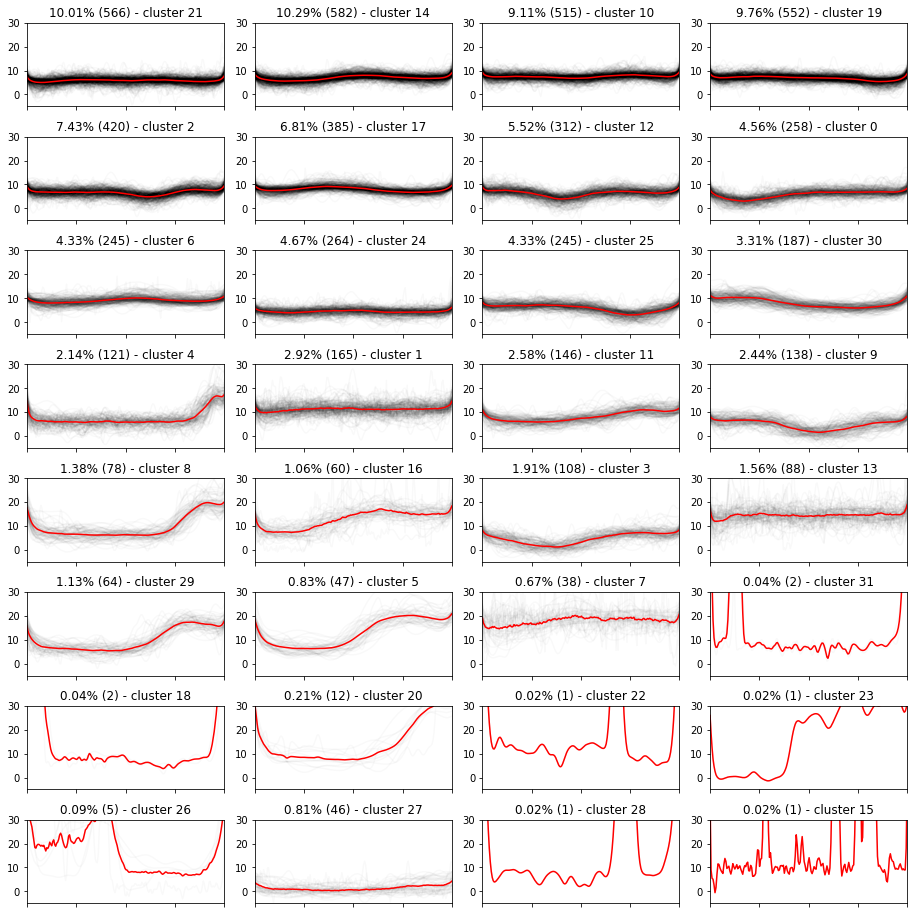

100%|██████████| 2851/2851 [00:02<00:00, 987.06it/s]


K238A-4MWT-90


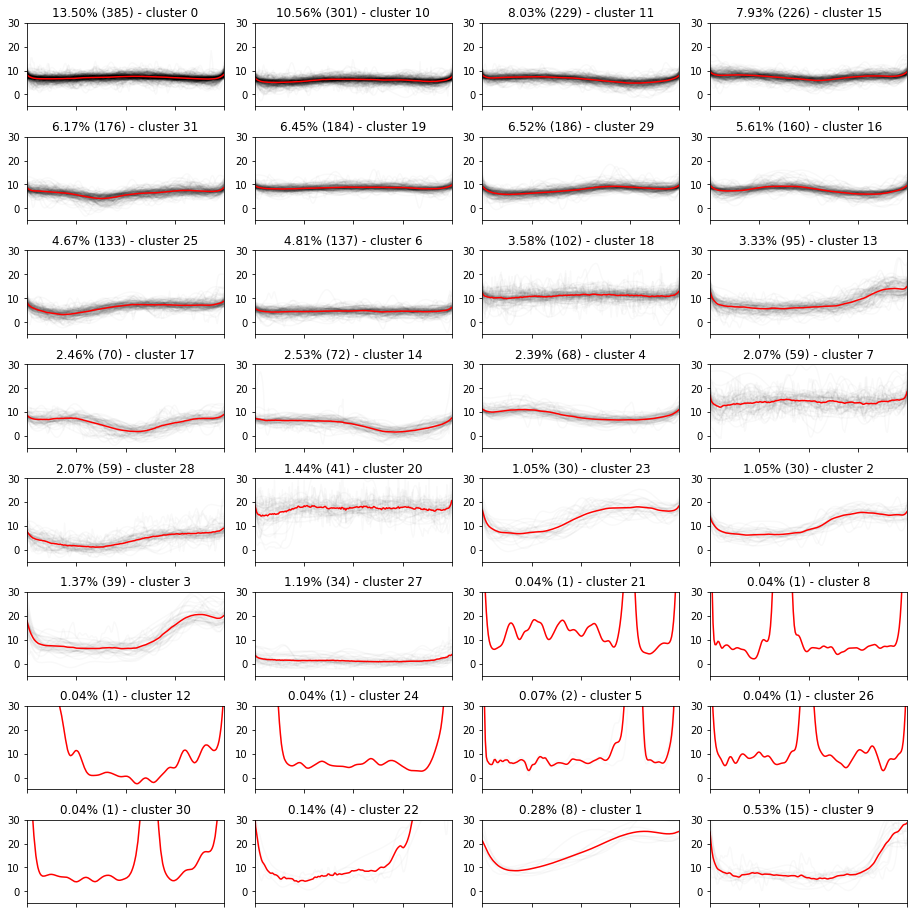

100%|██████████| 2497/2497 [00:02<00:00, 997.40it/s] 


K238A-4MpS129-100


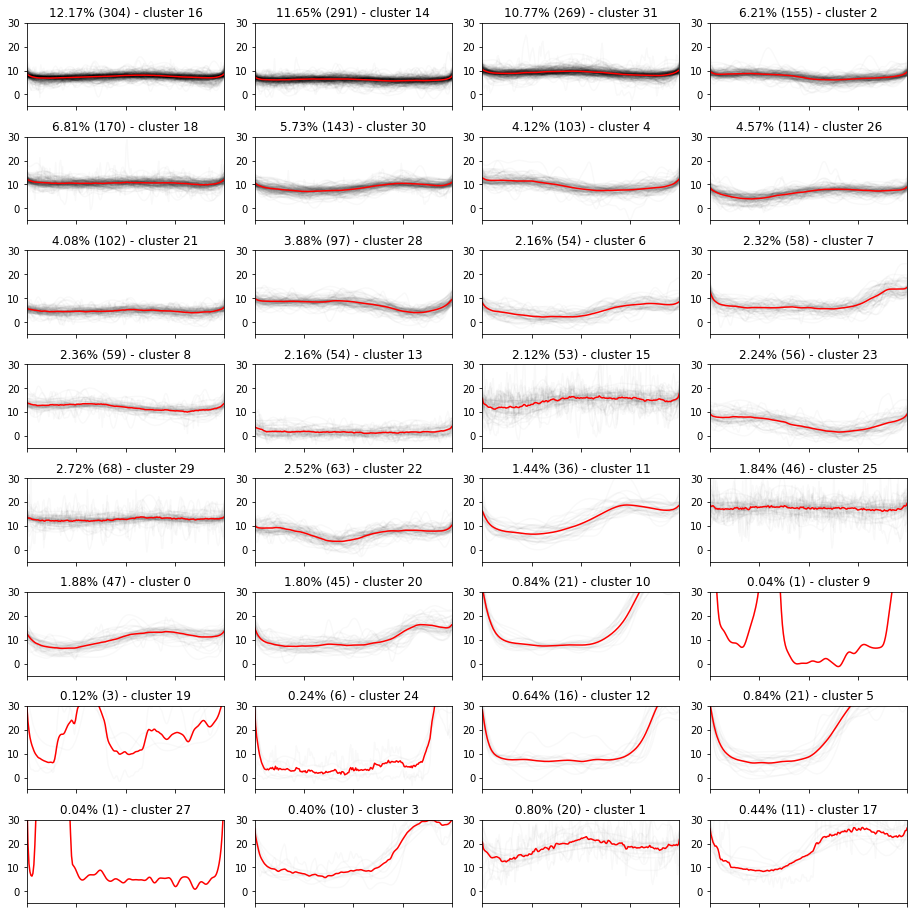

100%|██████████| 3924/3924 [00:03<00:00, 988.63it/s]


K238A-4MpS129-110


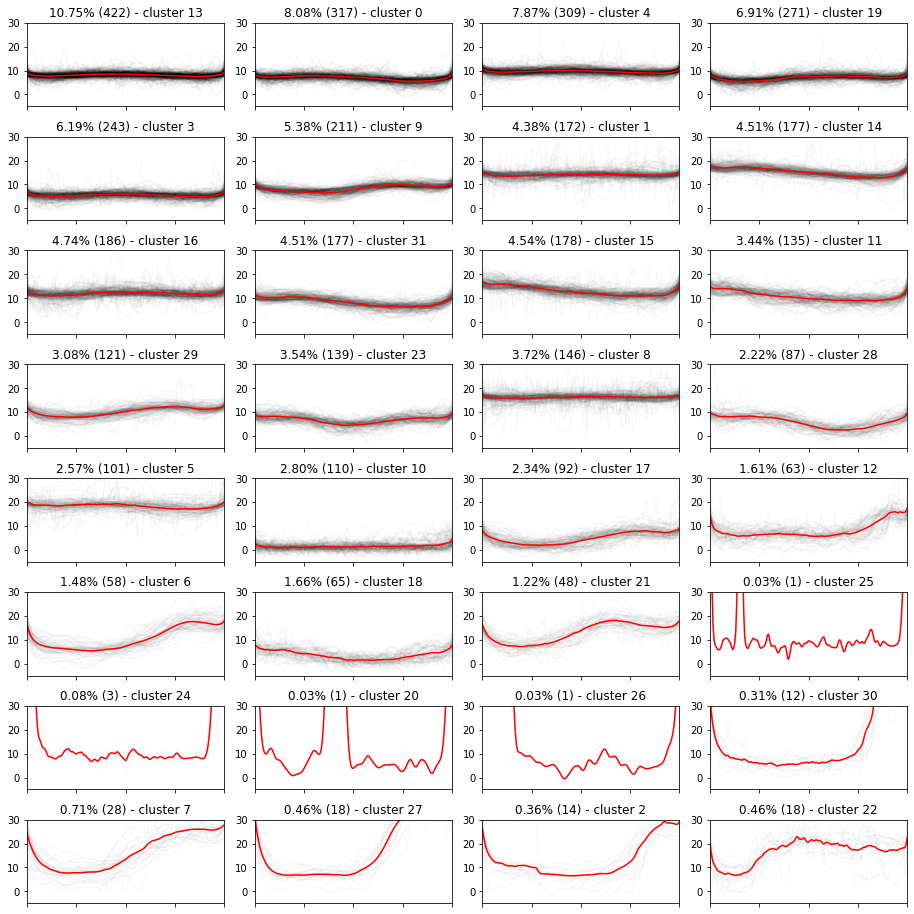

100%|██████████| 2626/2626 [00:02<00:00, 973.12it/s]


K238A-4MpS129-120


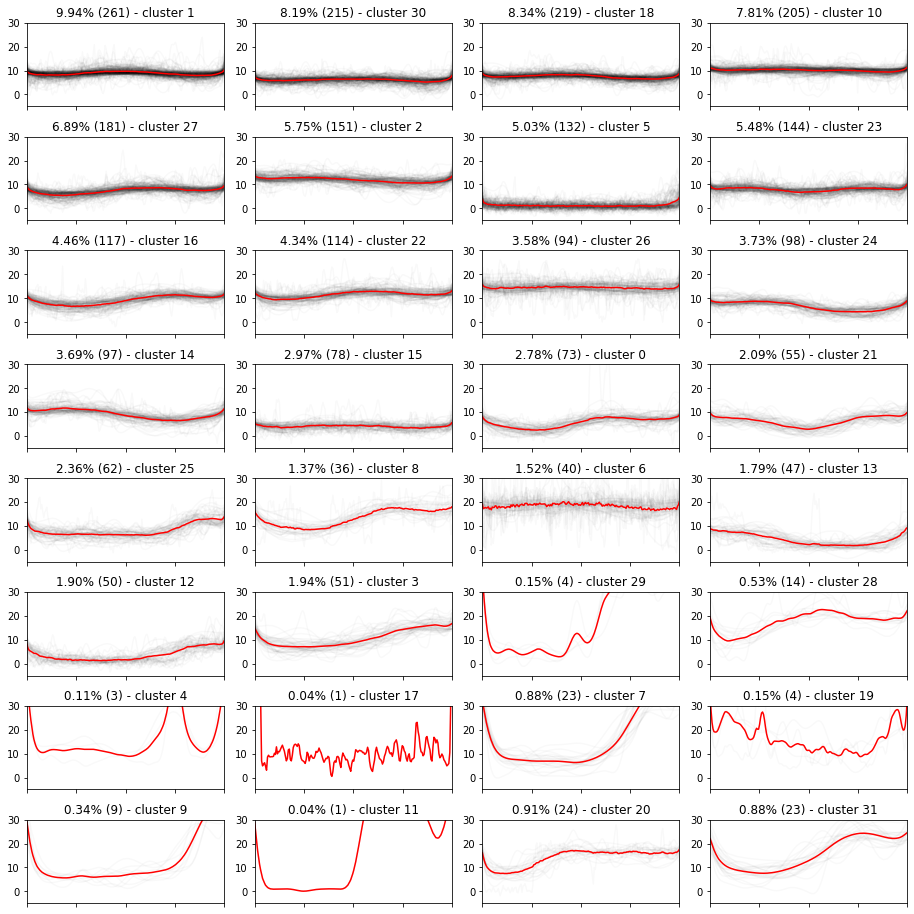

100%|██████████| 1016/1016 [00:01<00:00, 971.54it/s]


K238A-4MpS129-140


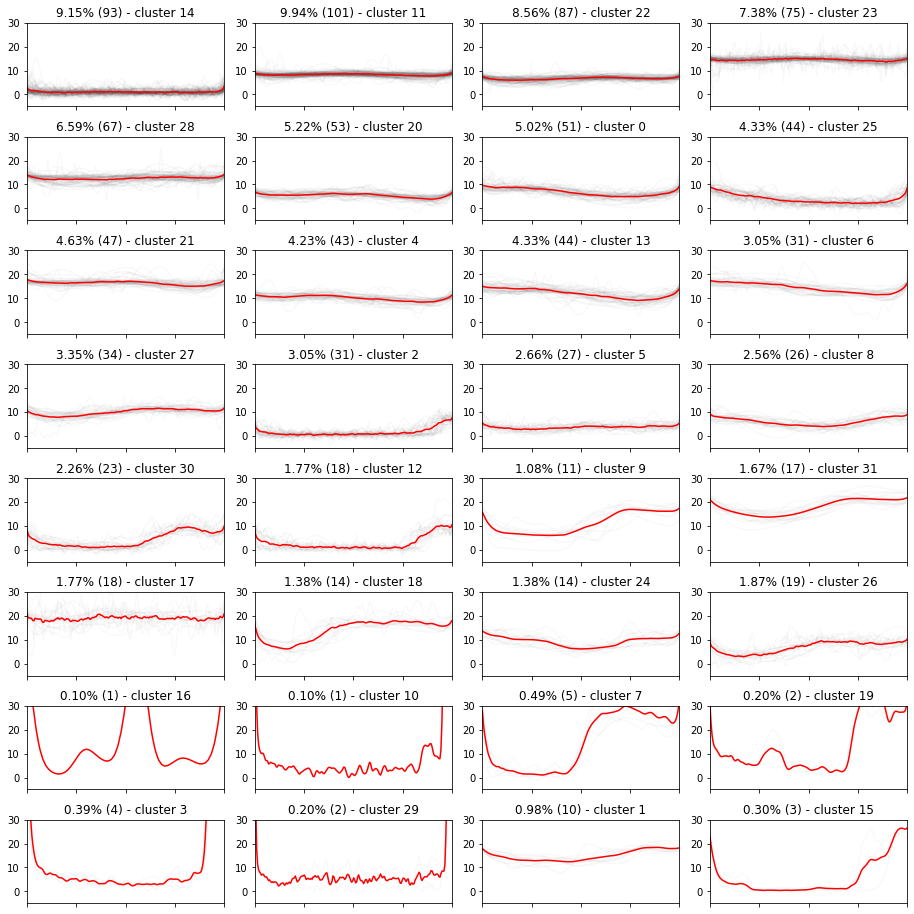

100%|██████████| 324/324 [00:00<00:00, 972.65it/s]


K238A-4MpS129-150


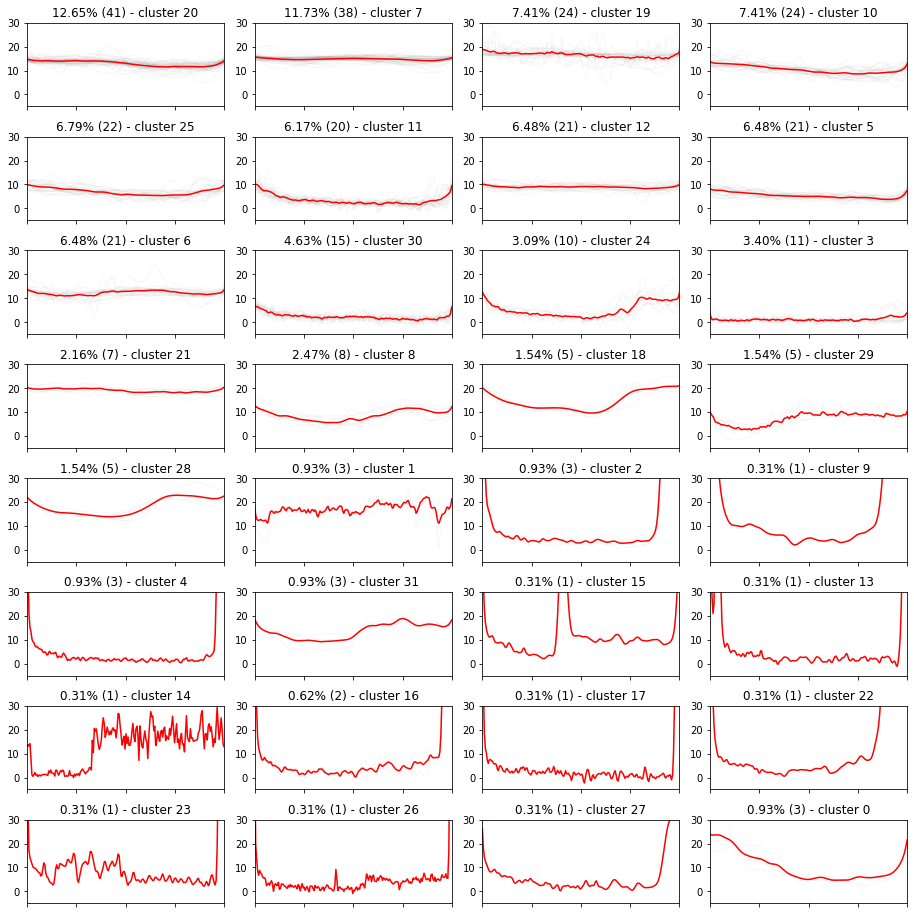

100%|██████████| 2405/2405 [00:02<00:00, 966.73it/s]


K238A-4MpS129-80


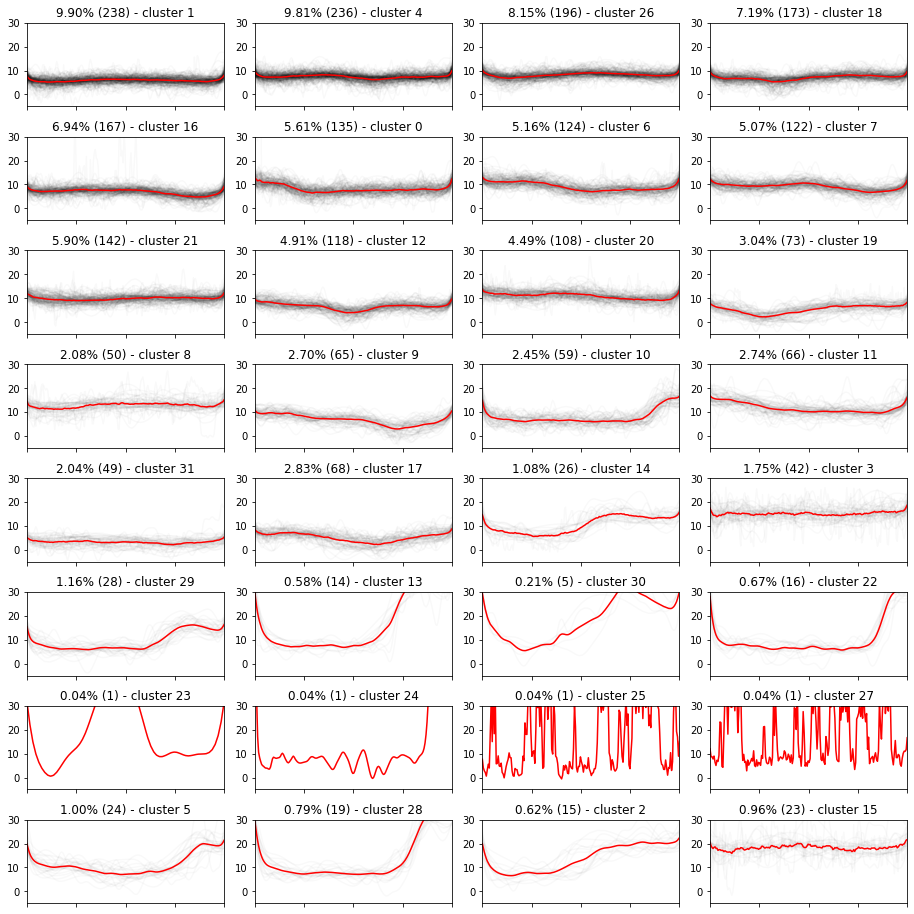

100%|██████████| 1721/1721 [00:01<00:00, 970.66it/s]


K238A-4MpS129-90


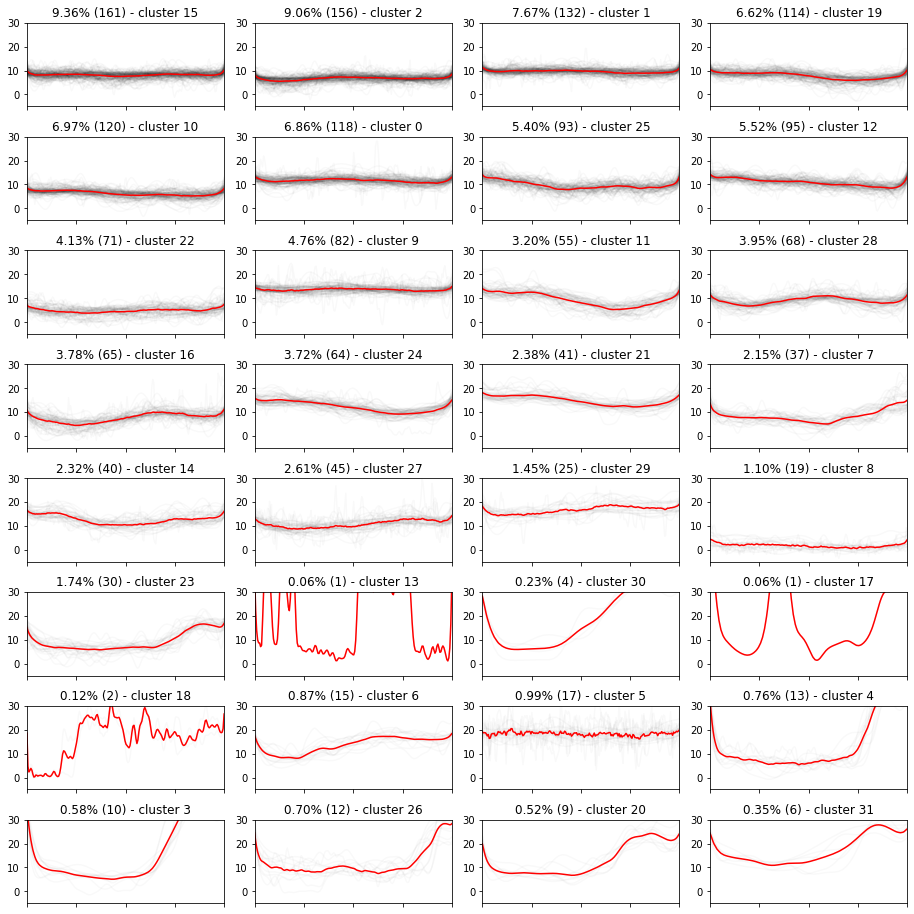

100%|██████████| 11564/11564 [00:11<00:00, 972.22it/s]


K238A-mix4M-100


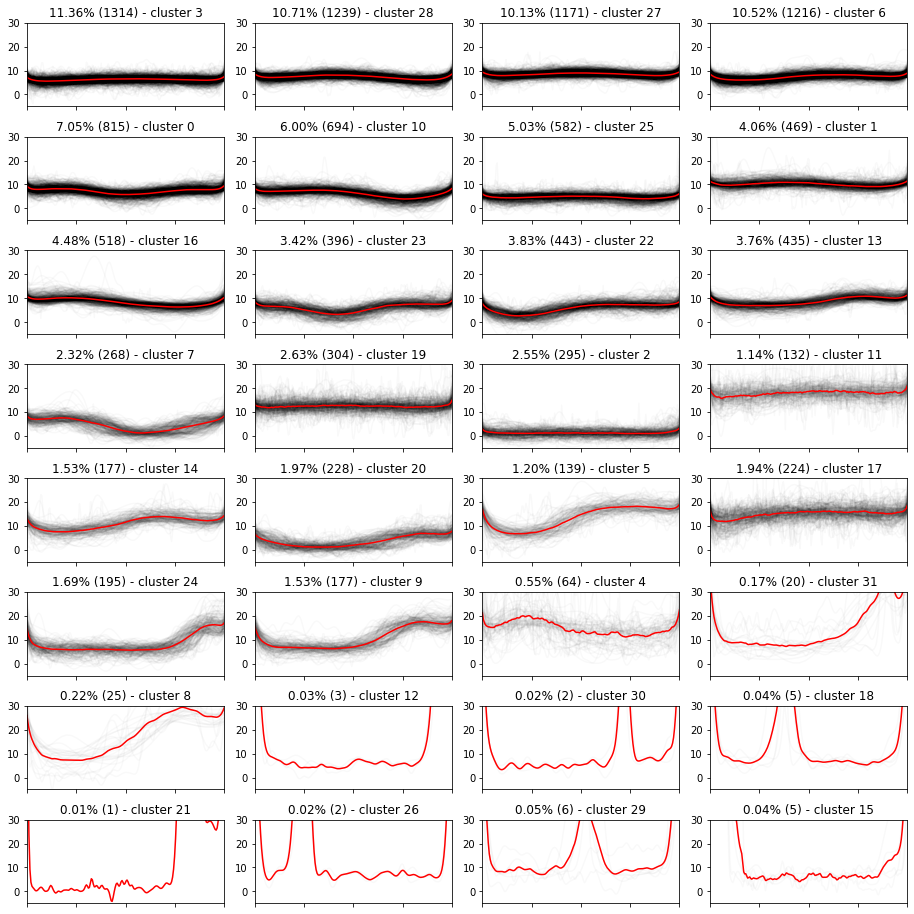

100%|██████████| 2591/2591 [00:02<00:00, 988.38it/s]


K238A-mix4M-120


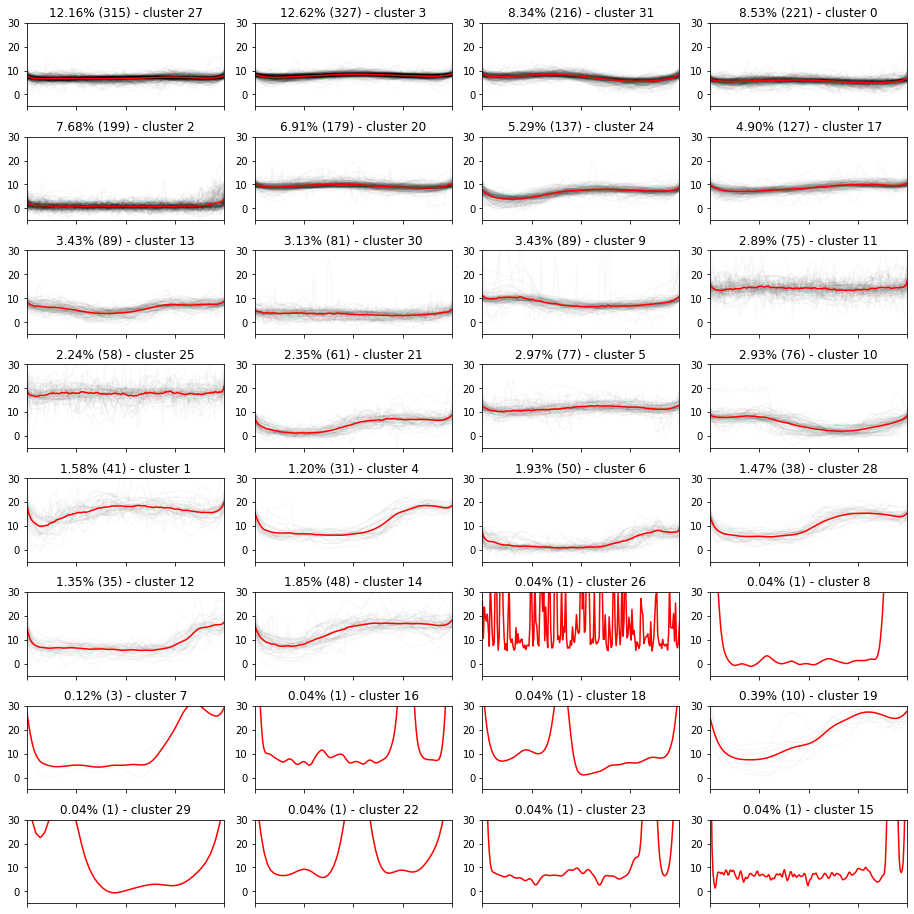

100%|██████████| 2893/2893 [00:02<00:00, 985.95it/s]


K238A-mix4M-140


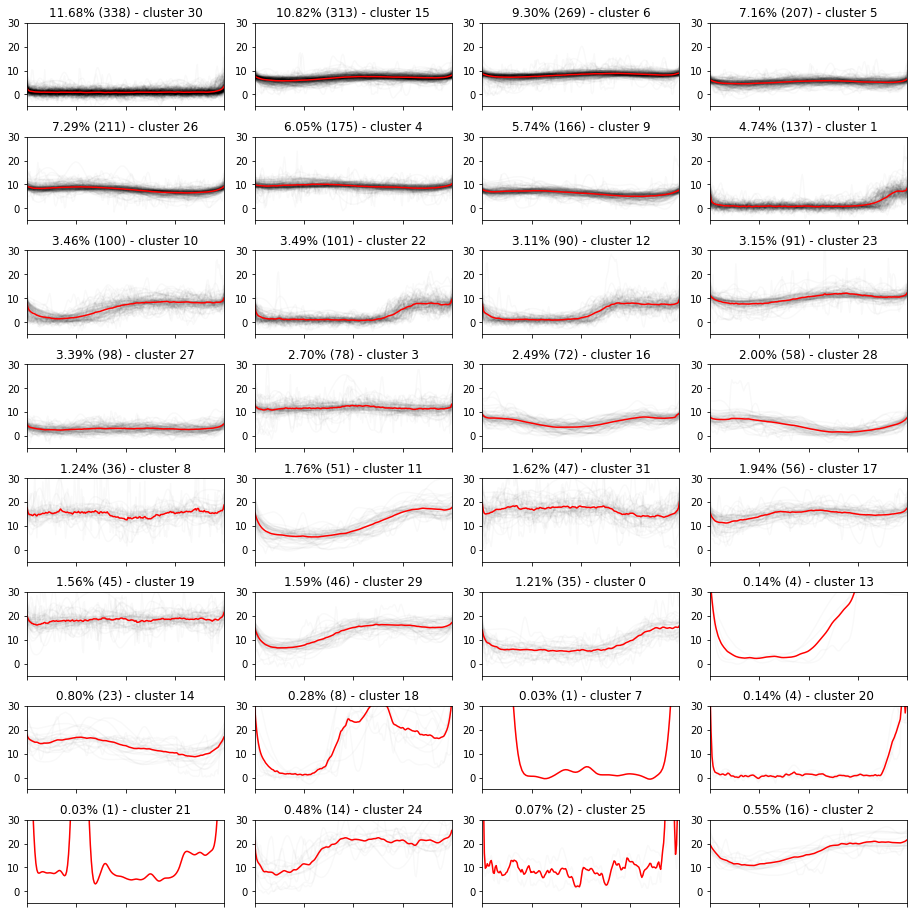

100%|██████████| 854/854 [00:00<00:00, 985.36it/s]


K238A-mix4M-150


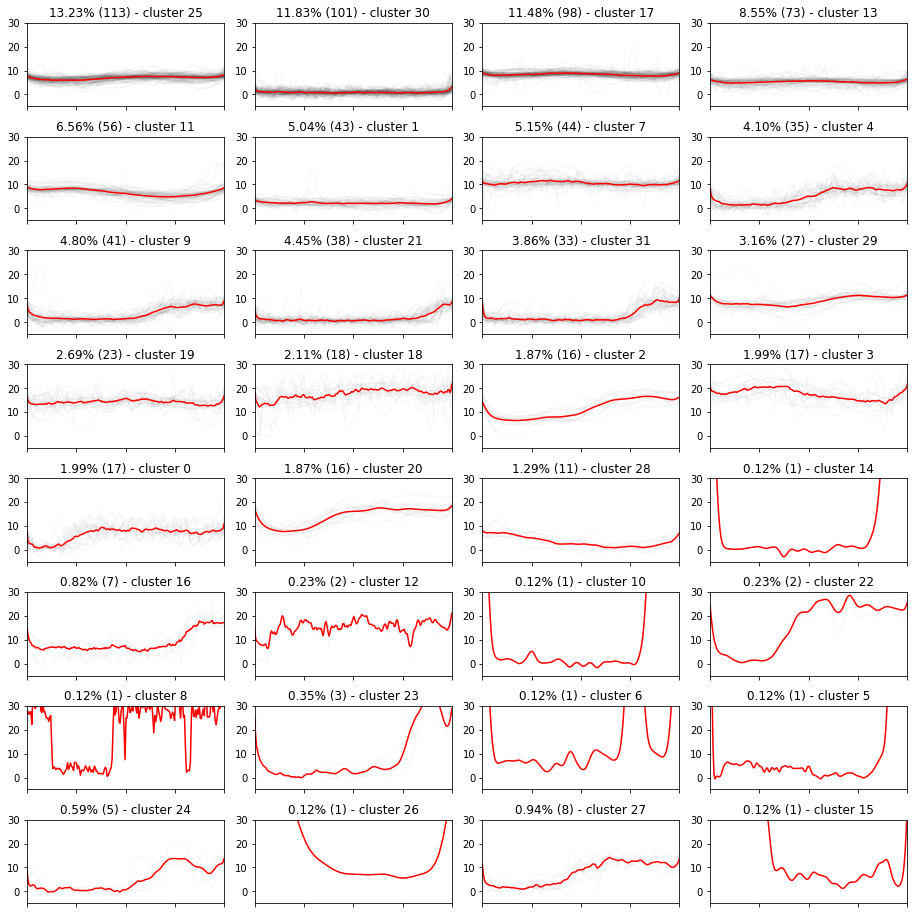

In [4]:
# parameters
N_interp = 200
N_clst = 32
ncol = 4
nrow = 8

for key in key_sels:
    events = events_dict[key]

    # interpolate events
    X = np.array([tsp.signals.downsample(x[:,1], N_interp) for x in tqdm(events)])
    
    # clustering
    clst = KMeans(N_clst)
    clst.fit(X)

    # get labels
    y = clst.labels_

    # split by clusters
    X_l = []
    ic_l = []
    for i in np.unique(y):
        ids = np.where(y == i)[0]
        X_l.append(X[ids])
        ic_l.append(ids)

    # get cluster centers
    Xc = clst.cluster_centers_

    # check
    assert ncol*nrow == N_clst

    # define x axis points
    t = np.linspace(0.0, 1.0, N_interp)

    # sort by cluster size
    ids_srtd = np.argsort([1e2*x.shape[0]//X.shape[0] for x in X_l])[::-1]

    # plots
    print(key)
    plt.figure(figsize=(3.2*ncol,1.6*nrow))
    for i in range(nrow):
        for j in range(ncol):
            # get 1d index
            k_ = ncol*i+j
            k = ids_srtd[k_]
            # subplot
            plt.subplot(nrow, ncol, k_+1)
            for x in X_l[k]:
                plt.plot(t, x, 'k-', alpha=0.025)
            plt.plot(t, Xc[k], 'r-')
            plt.xlim(0.0, 1.0)
            plt.ylim(-5.0, 30.0)
            plt.xticks([0.0, 0.25, 0.5, 0.75, 1.0], ['', '', '', '', ''])
            plt.title('{:.2f}% ({}) - cluster {}'.format(1e2*X_l[k].shape[0]/X.shape[0], X_l[k].shape[0], k))

    plt.tight_layout()
    plt.savefig("graphs/clustering_{}.png".format(key), dpi=200)
    plt.show()